- vgg16
- vgg19
- resnet
- inception(google net)
- mobile net
- nasnet
- efficient net

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50

In [7]:
from tensorflow.keras.preprocessing import image

In [8]:
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

In [9]:
import numpy as np

In [10]:
model = VGG16(weights ='imagenet')

553467096/553467096 [==============================] - 3s 0us/step


In [13]:
img_path = '/content/cat2.jpeg'

In [14]:
img = image.load_img(img_path,target_size = (224,224))

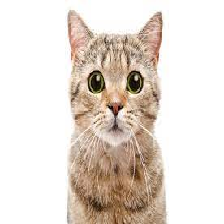

In [15]:
img

In [16]:
img = image.img_to_array(img)

In [17]:
img

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [18]:
img.shape

(224, 224, 3)

In [19]:
img = np.expand_dims(img,axis =0)

In [20]:
img.shape

(1, 224, 224, 3)

In [21]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
prediction = model.predict(img)

1/1 [==============================] - 8s 8s/step


In [23]:
prediction.size

1000

In [24]:
decode_predictions(prediction)

35363/35363 [==============================] - 0s 0us/step


[[('n02124075', 'Egyptian_cat', 0.83654606),
  ('n02123045', 'tabby', 0.136369),
  ('n02123159', 'tiger_cat', 0.016975176),
  ('n02127052', 'lynx', 0.0032129323),
  ('n03938244', 'pillow', 0.0015320831)]]

In [25]:
model2 = ResNet50(weights = 'imagenet')

102967424/102967424 [==============================] - 1s 0us/step


In [26]:
img

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [27]:
img = preprocess_input(img)

In [28]:
model2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [29]:
prediction = model2.predict(img)

1/1 [==============================] - 2s 2s/step


In [30]:
decode_predictions(prediction)

[[('n02124075', 'Egyptian_cat', 0.49968722),
  ('n02123045', 'tabby', 0.42066082),
  ('n02127052', 'lynx', 0.03551454),
  ('n02123159', 'tiger_cat', 0.03131163),
  ('n04589890', 'window_screen', 0.0011232239)]]

# **Finetuning of pretrained model**

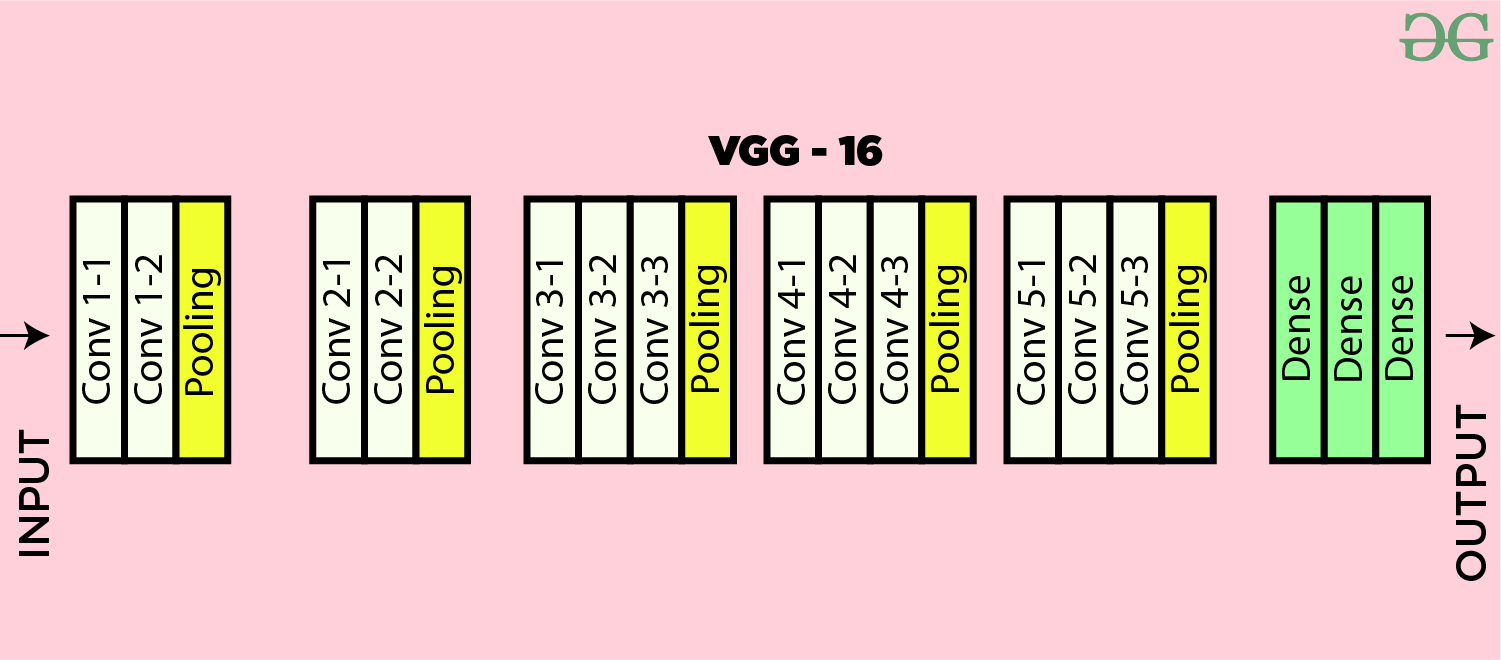

In [67]:
conv_base =VGG16(weights ='imagenet',
                 include_top = False,
                 input_shape=(150,150,3))

In [68]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [69]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [59]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(265,activation ='relu'))
model.add(Dense(1,activation ='sigmoid'))

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 265)               2171145   
                                                                 
 dense_3 (Dense)             (None, 1)                 266       
                                                                 
Total params: 16886099 (64.42 MB)
Trainable params: 16886099 (64.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
conv_base.trainable = False

In [37]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:14<00:00, 136MB/s]
100% 1.06G/1.06G [00:14<00:00, 76.4MB/s]


In [38]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [39]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/dogs_vs_cats/train',
    batch_size=32,
    image_size=(150,150),
    labels="inferred",
    label_mode="int"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/dogs_vs_cats/test',
    batch_size=32,
    image_size=(150,150),
    labels="inferred",
    label_mode="int"


)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [40]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
model.fit(train_ds,epochs=1,validation_data=validation_ds)

625/625 [==============================] - 66s 96ms/step - loss: 0.2767 - accuracy: 0.8829 - val_loss: 0.3105 - val_accuracy: 0.8574


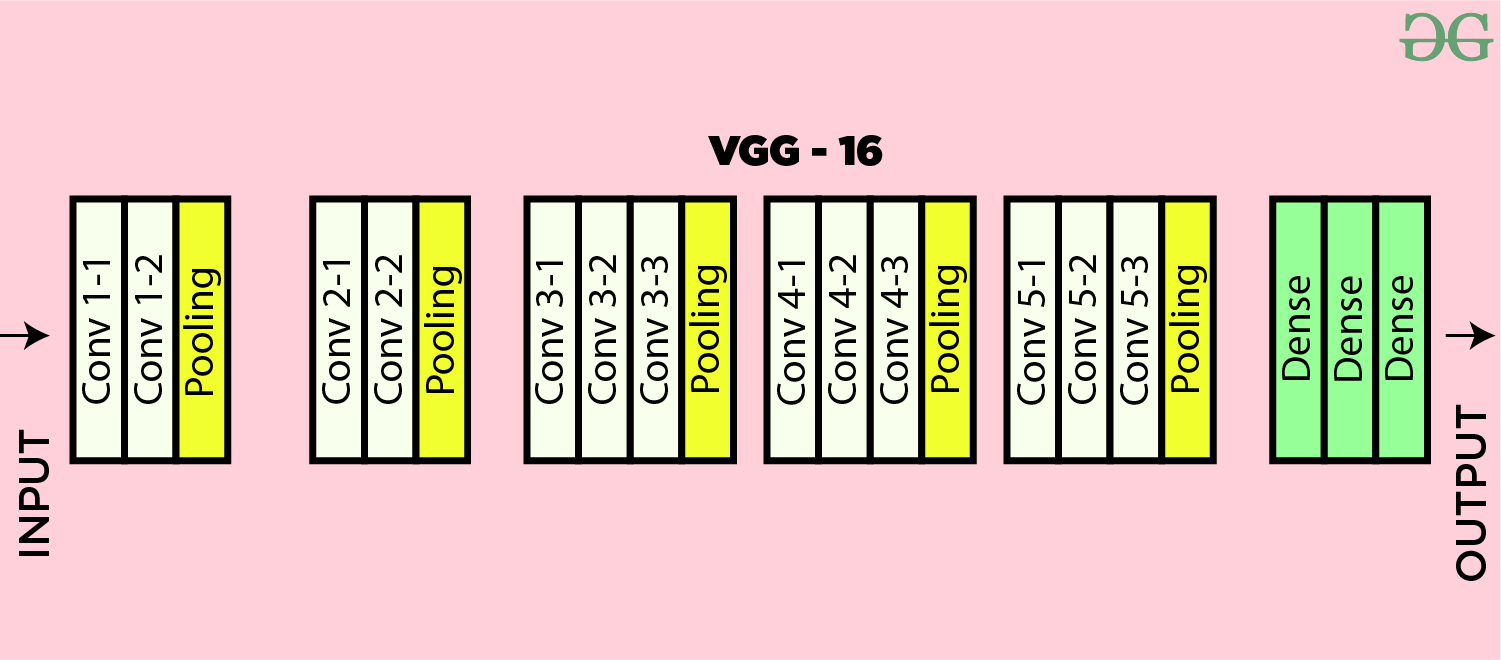

In [43]:
conv_base.layers

In [44]:
len(conv_base.layers)

19

In [86]:
for layer in conv_base.layers:
  print(layer.name)

input_6
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [102]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainable=True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [103]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [54]:
2359808 *3

7079424

In [104]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(265,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 265)               2171145   
                                                                 
 dense_5 (Dense)             (None, 1)                 266       
                                                                 
Total params: 16886099 (64.42 MB)
Trainable params: 9250835 (35.29 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [106]:
7079424+2171145+266

9250835

In [107]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [108]:
model.fit(train_ds,epochs=1,validation_data=validation_ds)

625/625 [==============================] - 72s 108ms/step - loss: 0.7231 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
